In [3]:
import tensorflow as tf
import numpy as np
import pickle

In [4]:
with open ('C:\\Users\\Wilfred\\Desktop\\Min-Max\\input_layer_4_6_12_3.pickle','rb') as file:
    input_data = pickle.load(file)
print(input_data.shape)

x_train = input_data[:100000,:]
x_test = input_data[100000:,:]


(105000, 24)


In [5]:
with open ('C:\\Users\\Wilfred\\Desktop\\Min-Max\\output_layer_4_6_12_3.pickle','rb') as file:
    output_data = pickle.load(file)
output_data = np.transpose(output_data)
y_train = output_data[:100000,:]
y_test = output_data[100000:,:]
print(output_data.shape)

(105000, 12)


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(300,input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(300, activation = 'relu'),
    tf.keras.layers.Dense(300, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 100, verbose = 2,validation_data = (x_test, y_test))


Train on 100000 samples, validate on 5000 samples
Epoch 1/100
100000/100000 - 5s - loss: 0.2854 - accuracy: 0.8833 - val_loss: 0.2127 - val_accuracy: 0.9118
Epoch 2/100
100000/100000 - 4s - loss: 0.2029 - accuracy: 0.9140 - val_loss: 0.1965 - val_accuracy: 0.9154
Epoch 3/100
100000/100000 - 4s - loss: 0.1910 - accuracy: 0.9164 - val_loss: 0.1860 - val_accuracy: 0.9178
Epoch 4/100
100000/100000 - 4s - loss: 0.1804 - accuracy: 0.9201 - val_loss: 0.1790 - val_accuracy: 0.9210
Epoch 5/100
100000/100000 - 4s - loss: 0.1672 - accuracy: 0.9256 - val_loss: 0.1569 - val_accuracy: 0.9297
Epoch 6/100
100000/100000 - 4s - loss: 0.1449 - accuracy: 0.9334 - val_loss: 0.1371 - val_accuracy: 0.9353
Epoch 7/100
100000/100000 - 4s - loss: 0.1264 - accuracy: 0.9398 - val_loss: 0.1225 - val_accuracy: 0.9406
Epoch 8/100
100000/100000 - 4s - loss: 0.1118 - accuracy: 0.9462 - val_loss: 0.1092 - val_accuracy: 0.9477
Epoch 9/100
100000/100000 - 5s - loss: 0.1016 - accuracy: 0.9512 - val_loss: 0.1016 - val_accu

Epoch 77/100
100000/100000 - 3s - loss: 0.0091 - accuracy: 0.9967 - val_loss: 0.0517 - val_accuracy: 0.9886
Epoch 78/100
100000/100000 - 3s - loss: 0.0104 - accuracy: 0.9964 - val_loss: 0.0529 - val_accuracy: 0.9877
Epoch 79/100
100000/100000 - 3s - loss: 0.0106 - accuracy: 0.9963 - val_loss: 0.0549 - val_accuracy: 0.9883
Epoch 80/100
100000/100000 - 3s - loss: 0.0147 - accuracy: 0.9950 - val_loss: 0.0740 - val_accuracy: 0.9832
Epoch 81/100
100000/100000 - 3s - loss: 0.0223 - accuracy: 0.9926 - val_loss: 0.0506 - val_accuracy: 0.9877
Epoch 82/100
100000/100000 - 3s - loss: 0.0109 - accuracy: 0.9962 - val_loss: 0.0494 - val_accuracy: 0.9893
Epoch 83/100
100000/100000 - 3s - loss: 0.0069 - accuracy: 0.9976 - val_loss: 0.0471 - val_accuracy: 0.9898
Epoch 84/100
100000/100000 - 3s - loss: 0.0068 - accuracy: 0.9977 - val_loss: 0.0492 - val_accuracy: 0.9893
Epoch 85/100
100000/100000 - 3s - loss: 0.0089 - accuracy: 0.9968 - val_loss: 0.0601 - val_accuracy: 0.9874
Epoch 86/100
100000/100000 -

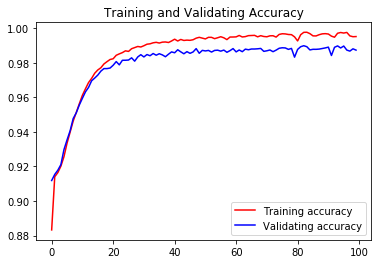

In [8]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [9]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Min_Max\\Min_Max_4_6_12_3_model.h5')